<a href="https://colab.research.google.com/github/daniyalaamir110/ML_course/blob/main/11_gradient_descent_logistic_with_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
X_train = np.random.rand(5, 3)
y_train = np.array([0, 1, 0, 1, 0])

In [3]:
def tabulate_data(x, y):
  n = len(x[0])
  m = len(x)
  fig, ax = plt.subplots(figsize=(4 * n, 1))
  cols = []
  col_labels = []
  for i in range(n):
    cols.append(x[:, i])
    col_labels.append(f"$x_{i}$")
  cols.append(y)
  col_labels.append("y")
  table_data = np.column_stack(cols)
  table = ax.table(cellText=table_data, colLabels=col_labels, loc='center')
  ax.axis('off')

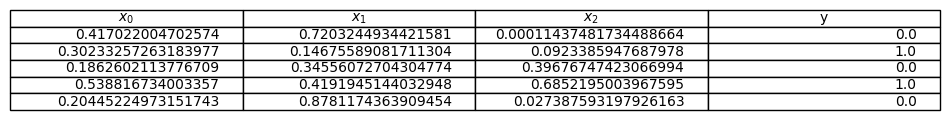

In [4]:
tabulate_data(X_train, y_train)

In [5]:
def sigmoid(z):
  return 1/ (1 + np.exp(-z))

In [6]:
def compute_cost(x, y, w, b, lambda_ = 1):
  m, n = x.shape
  f_wb = sigmoid(np.dot(x, w) + b)
  cost = np.sum(-y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb)) / m + lambda_ * np.sum(w ** 2)/(2 * m)
  return cost

In [7]:
def compute_gradient(x, y, w, b, lambda_ = 1):
  m, n = x.shape
  f_wb = sigmoid(np.dot(x, w) + b)
  dj_dw = (np.dot((f_wb - y), x) + lambda_ * w) / m
  dj_db = np.sum(f_wb - y) / m
  return dj_dw, dj_db

In [8]:
def gradient_descent(x, y, w_init, b_init, alpha, lambda_, iteration_count, cost_function, gradient_function):

  w = w_init
  b = b_init

  for i in range(iteration_count):
    if i == 0:
      print("FIRST ITERATION")
      dj_dw_ur, dj_db_ur = gradient_function(x, y, w, b, 0)
      w_ur = w - alpha * dj_dw_ur
      b_ur = b - alpha * dj_db_ur
      print(f"With lambda=0: \tdj_dw={dj_dw_ur}, w={w_ur}, b={b_ur}")

    dj_dw, dj_db = gradient_function(x, y, w, b, lambda_)

    w -= alpha * dj_dw
    b -= alpha * dj_db

    if i == 0:
      print(f"With lambda={lambda_}: \tdj_dw={dj_dw}, w={w}, b={b}")

  return w, b

In [9]:
w_init = np.random.rand(X_train.shape[1])
b_init = 0.5
lambda_init = 0.7
tmp_alpha = 1.0e-2
lambda_ = 0.7
iterations = 1000

w_final, b_final = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, lambda_, iterations, compute_cost, compute_gradient)

FIRST ITERATION
With lambda=0: 	dj_dw=[0.07993468 0.26165241 0.02954656], w=[0.66966816 0.41468828 0.55839436], b=0.4965820100502721
With lambda=0.7: 	dj_dw=[0.17380013 0.32007508 0.10776313], w=[0.66872951 0.41410405 0.5576122 ], b=0.4965820100502721


In [10]:
print(f"w = {w_final}, b = {b_final}")

w = [ 0.25064688 -0.46994068  0.33802438], b = -0.3268698371877965


In [11]:
def get_model_logistic_regression(w, b):
  return lambda x: sigmoid(np.dot(x, w) + b)

In [12]:
model = get_model_logistic_regression(w_final, b_final)

In [13]:
X_pred = np.random.rand(5, 3)
y_pred = model(X_train)

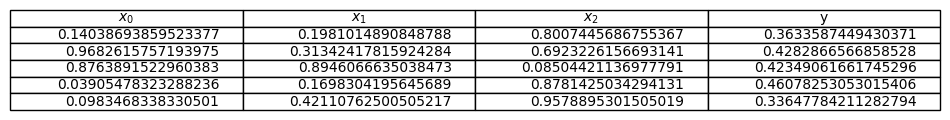

In [14]:
tabulate_data(X_pred, y_pred)